**Importing the necessary libraries**

In [ ]:
# Importing general libraries
import os
import json
import numpy as np
import pandas as pd
import re
import string

# Text processing libraries
import nltk
import spacy
import en_core_web_sm
from textblob import TextBlob
from nltk.corpus import stopwords

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot

# Machine Learning and Metrics
from sklearn import metrics
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, precision_recall_fscore_support,
                             classification_report, confusion_matrix, ConfusionMatrixDisplay)

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Load spaCy model
nlp = en_core_web_sm.load()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the data**

In [ ]:
# Opening JSON file
j = open('/content/drive/MyDrive/IT_Ticket/complaints-2021-05-14_08_16_.json',)

# Returns JSON object as a dictionary
data = json.load(j)

# Create a dataframe out of dictionary
df = pd.json_normalize(data)

In [ ]:
# Inspect the dataframe to understand the given data.
df.head(5)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('_source.tags').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('_source.zip_code').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('_source.complaint_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['_score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '_score'}, axis=1)
              .sort_values('_score', ascending=True))
  xs = counted['_score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('_score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('_score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['_score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '_score'}, axis=1)
              .sort_values('_score', ascending=True))
  xs = counted['_score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('_score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('_source.tags')):
  _plot_series(series, series_name, i)
  fig.legend(title='_source.tags', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('_score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['_score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '_score'}, axis=1)
              .sort_values('_score', ascending=True))
  xs = counted['_score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('_score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('_source.zip_code')):
  _plot_series(series, series_name, i)
  fig.legend(title='_source.zip_code', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('_score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['_score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '_score'}, axis=1)
              .sort_values('_score', ascending=True))
  xs = counted['_score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('_score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('_source.complaint_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='_source.complaint_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('_score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['_source.tags'].value_counts()
    for x_label, grp in _df_8.groupby('_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('_id')
_ = plt.ylabel('_source.tags')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['_source.zip_code'].value_counts()
    for x_label, grp in _df_9.groupby('_source.tags')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('_source.tags')
_ = plt.ylabel('_source.zip_code')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['_source.complaint_id'].value_counts()
    for x_label, grp in _df_10.groupby('_source.zip_code')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('_source.zip_code')
_ = plt.ylabel('_source.complaint_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['_source.issue'].value_counts()
    for x_label, grp in _df_11.groupby('_source.complaint_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('_source.complaint_id')
_ = plt.ylabel('_source.issue')

In [ ]:
#Shape of Dataframe
df.shape

(78313, 22)

In [ ]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [ ]:
df.describe()

,_score
count,78313.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


**Data Preparation**

In [ ]:
#Assign new column names
df = df[['_source.complaint_what_happened','_source.product','_source.sub_product',]]
df.head()

,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [ ]:
# lets rename the column names to be more read friendly

df = df.rename(columns={'_source.complaint_what_happened': 'complaint_text', '_source.product': 'category','_source.sub_product': 'sub_category'})
df.head()

,complaint_text,category,sub_category
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [ ]:
# lets merge the category and sub-category this will help us in deciding the topics after NMF modelling
df['category'] = df['category'] + '+' + df['sub_category']
df = df.drop(['sub_category'],axis= 1)
df.head()

,complaint_text,category
0,,Debt collection+Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
3,,Mortgage+Conventional home mortgage
4,,Credit card or prepaid card+General-purpose cr...


In [ ]:
# Check the nan complaints
df.complaint_text.isnull().sum()

0

In [ ]:
# Check the empty string complaints
len(df[df['complaint_text']==''])

57241

In [ ]:
#Assign nan in place of blanks in the complaints column
# lets replace empty complain with nan value
df[df['complaint_text']==''] = np.nan
df.complaint_text.isnull().sum()

57241

In [ ]:
print(df['complaint_text'].iloc[0])

nan


In [ ]:
#Remove all rows where complaints column is nan
# Lets drop all the rows where complaint_text is null
df = df[~df['complaint_text'].isnull()]
df.complaint_text.isnull().sum()

0

In [ ]:
print(df['complaint_text'].iloc[0])

Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. 
In 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. 
I have a right to know this information as a consumer. 

Chase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.


In [ ]:
df.head()

,complaint_text,category
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
14,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account


In [ ]:
df.shape

(21072, 2)

**Text Preprocessing**

In [ ]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_texts(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove numbers
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df['complaint_text'] = df['complaint_text'].apply(clean_texts)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Cleaning df['complaint_what_happened']
df['complaint_text']= df['complaint_text'].apply(lambda x: clean_texts(x))

In [ ]:
#Write your function to Lemmatize the texts
def lemma_texts(text):

    # Initialize empty list to store lemmas
    lemma_list = []

    # Extract lemmas of given text and add to the list 'sent'
    document = nlp(text)
    for word in document:
        lemma_list.append(word.lemma_)

    # return string converted form of the list of lemmas
    return " ".join(lemma_list)

In [ ]:
# Add a column for lemmatized complaints to the dataframe
df["lemmatized_complaint"] =  df.apply(lambda x: lemma_texts(x['complaint_text']), axis=1)

# View the dataframe
df.head()

,complaint_text,category,lemmatized_complaint
1,good morning name xxxx xxxx appreciate could h...,Debt collection+Credit card debt,good morning name xxxx xxxx appreciate could h...
2,upgraded xxxx xxxx card told agent upgrade ann...,Credit card or prepaid card+General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade anni...
10,chase card reported however fraudulent applica...,"Credit reporting, credit repair services, or o...",chase card report however fraudulent applicati...
11,trying book xxxx xxxx ticket came across offer...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come across offer ap...
14,grand son give check deposit chase account fun...,Checking or savings account+Checking account,grand son give check deposit chase account fun...


In [ ]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints
df_clean=df[['complaint_text','lemmatized_complaint']]

In [ ]:
df_clean.head()

,complaint_text,lemmatized_complaint
1,good morning name xxxx xxxx appreciate could h...,good morning name xxxx xxxx appreciate could h...
2,upgraded xxxx xxxx card told agent upgrade ann...,upgrade xxxx xxxx card tell agent upgrade anni...
10,chase card reported however fraudulent applica...,chase card report however fraudulent applicati...
11,trying book xxxx xxxx ticket came across offer...,try book xxxx xxxx ticket come across offer ap...
14,grand son give check deposit chase account fun...,grand son give check deposit chase account fun...


In [ ]:
# import nltk
# nltk.download('punkt')

In [ ]:
# nltk.download('averaged_perceptron_tagger')

In [ ]:
#Write your function to extract the POS tags

# Extracting singular nouns
def singular_nouns(text):


    # Creating a textblob object
    text_blob = TextBlob(text)

    # extracting words with tags 'NN', joining them and return
    return ' '.join([ word for (word,tag) in text_blob.tags if tag == "NN"])


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Download the English tagger data

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# Applying the function to create a new column containing only singular nouns
df_clean["complaint_POS_removed"] =  df_clean.apply(lambda x: singular_nouns(x['lemmatized_complaint']), axis=1)

# View the dataframe
df_clean.head()

,complaint_text,lemmatized_complaint,complaint_POS_removed
1,good morning name xxxx xxxx appreciate could h...,good morning name xxxx xxxx appreciate could h...,morning name appreciate chase bank cardmember ...
2,upgraded xxxx xxxx card told agent upgrade ann...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date information order upgrade...
10,chase card reported however fraudulent applica...,chase card report however fraudulent applicati...,card report application submit identity consen...
11,trying book xxxx xxxx ticket came across offer...,try book xxxx xxxx ticket come across offer ap...,book ticket come offer apply ticket card infor...
14,grand son give check deposit chase account fun...,grand son give check deposit chase account fun...,son check deposit chase account fund chase ban...


**Exploratory Data Analysis**

In [ ]:
#lenght of character in 'complaint_POS_removed'
char_len=[len(x) for x in df_clean['complaint_POS_removed']]
char_len[:15]

[175, 105, 81, 411, 183, 7, 562, 606, 1288, 45, 17, 218, 137, 139, 650]

Text(0, 0.5, 'No. of Complaints')

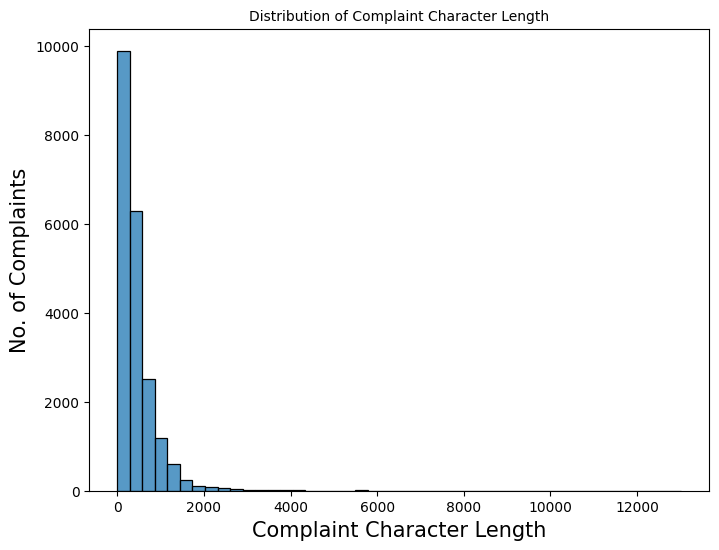

In [ ]:
## Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=[8,6])
sns.histplot(data = char_len,bins=45)
plt.title('Distribution of Complaint Character Length', fontsize=10)
plt.xlabel('Complaint Character Length',size=15)
plt.ylabel('No. of Complaints',size=15)

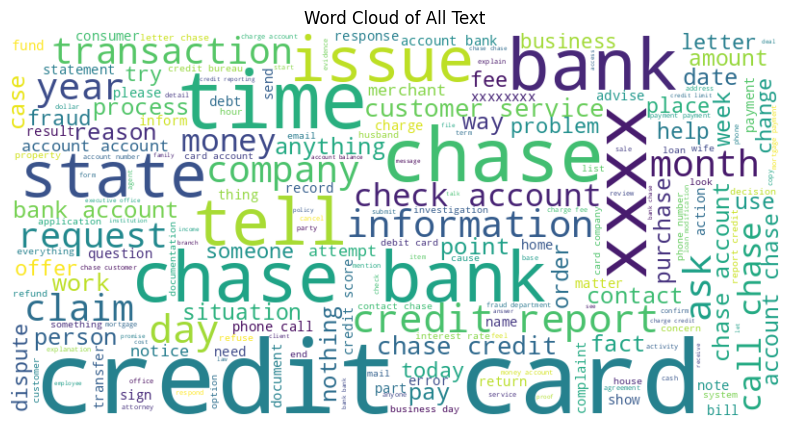

In [ ]:
# Combine all text in the dataset
from wordcloud import WordCloud
all_text = ' '.join(df_clean['complaint_POS_removed'])

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Text')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

**Feature Extraction**

In [ ]:
#Write your code here to initialise the TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [ ]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.complaint_POS_removed)

In [ ]:
dtm

<21072x7391 sparse matrix of type '<class 'numpy.float64'>'
	with 719633 stored elements in Compressed Sparse Row format>

In [ ]:
# Use get_feature_names_out() instead of get_feature_names()
tfidf.get_feature_names_out()[:10]

array(['aa', 'aarp', 'aback', 'abandon', 'abandonment', 'abatement',
       'abbreviation', 'abd', 'abet', 'abhorrent'], dtype=object)

**Topic Modelling using NMF (Non-Matrix Factorization)**

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
#Load your nmf_model with the n_components i.e 5
num_topics =  5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

In [ ]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

7391

In [ ]:
# Print the top word of a sample component
topic_single = nmf_model.components_[0]
topic_single.argsort()
top_word_index = topic_single.argsort()[-20:]
for index in top_word_index:
    print(tfidf.get_feature_names_out()[index])

cash
time
xxxx
fraud
customer
business
claim
transfer
number
transaction
tell
branch
day
fund
deposit
chase
money
check
bank
account


In [ ]:
#Print the Top20 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f'TOP 20 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    print('\n')

TOP 20 WORDS FOR TOPIC #0
['cash', 'time', 'xxxx', 'fraud', 'customer', 'business', 'claim', 'transfer', 'number', 'transaction', 'tell', 'branch', 'day', 'fund', 'deposit', 'chase', 'money', 'check', 'bank', 'account']


TOP 20 WORDS FOR TOPIC #1
['reason', 'bureaus', 'identity', 'balance', 'reporting', 'use', 'year', 'application', 'letter', 'limit', 'debt', 'information', 'score', 'company', 'account', 'chase', 'inquiry', 'report', 'card', 'credit']


TOP 20 WORDS FOR TOPIC #2
['state', 'information', 'refinance', 'xxxx', 'bank', 'foreclosure', 'request', 'document', 'sale', 'house', 'time', 'rate', 'letter', 'year', 'property', 'modification', 'home', 'chase', 'mortgage', 'loan']


TOP 20 WORDS FOR TOPIC #3
['customer', 'use', 'xxxx', 'company', 'time', 'balance', 'statement', 'refund', 'pay', 'service', 'fraud', 'claim', 'merchant', 'purchase', 'transaction', 'dispute', 'chase', 'card', 'fee', 'charge']


TOP 20 WORDS FOR TOPIC #4
['plan', 'xxxxxxxx', 'history', 'xxxx', 'mortgage'

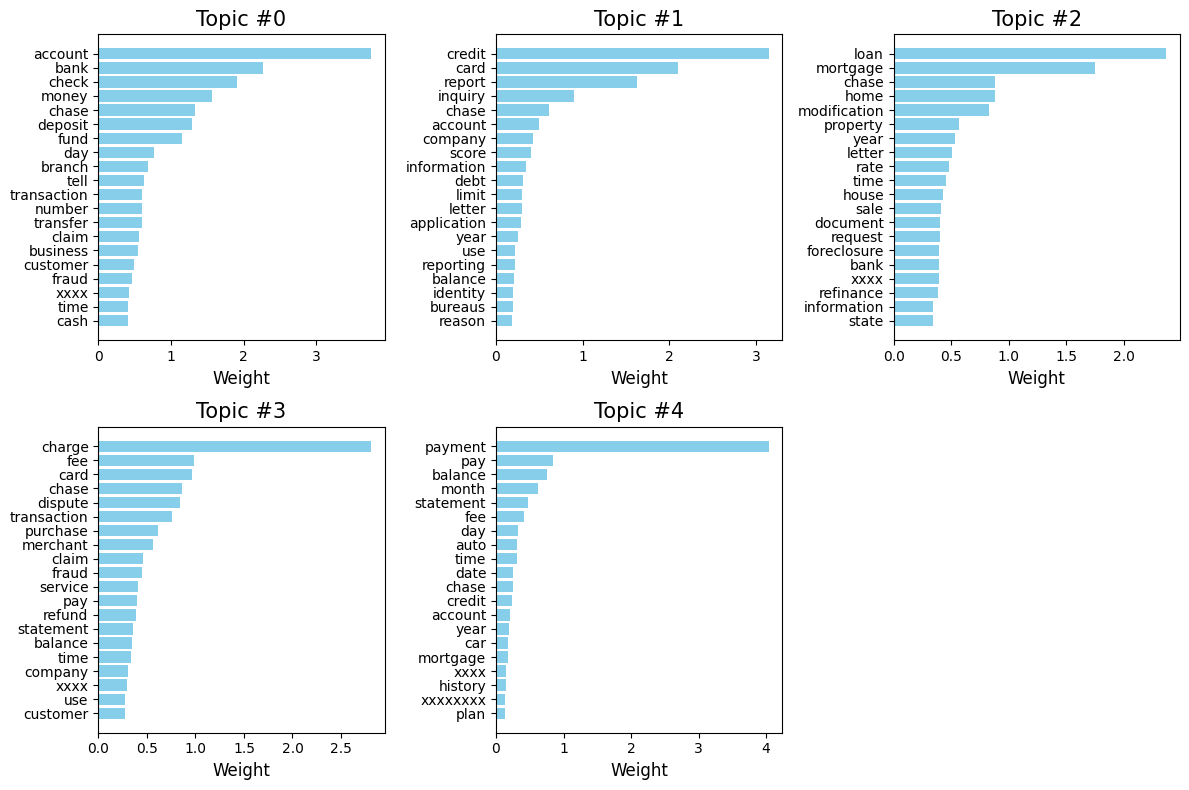

In [ ]:
# Visualize Top Words for each Topic
num_words = 20
plt.figure(figsize=(12, 8))

for i, topic in enumerate(nmf_model.components_):
    plt.subplot(2, 3, i + 1)
    top_words_idx = topic.argsort()[-num_words:]
    top_words = [tfidf.get_feature_names_out()[index] for index in top_words_idx]
    top_word_scores = topic[top_words_idx]
    plt.barh(top_words, top_word_scores, color='skyblue')
    plt.title(f'Topic #{i}', fontsize=15)
    plt.xlabel('Weight', fontsize=12)
    plt.tight_layout()

plt.show()


In [ ]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

topic_result = nmf_model.transform(dtm)
topic_result[0].round(2)
topic_result[0].argmax()
topic_result.argmax(axis=1)

array([0, 1, 1, ..., 3, 4, 4])

In [ ]:
# Create a new 'Topic' column and assign the best topic to each of the complaints

df_clean['Topic'] = topic_result.argmax(axis=1)

In [ ]:
df_clean.shape

(21072, 4)

In [ ]:
df_clean.head()

,complaint_text,lemmatized_complaint,complaint_POS_removed,Topic
1,good morning name xxxx xxxx appreciate could h...,good morning name xxxx xxxx appreciate could h...,morning name appreciate chase bank cardmember ...,0
2,upgraded xxxx xxxx card told agent upgrade ann...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date information order upgrade...,1
10,chase card reported however fraudulent applica...,chase card report however fraudulent applicati...,card report application submit identity consen...,1
11,trying book xxxx xxxx ticket came across offer...,try book xxxx xxxx ticket come across offer ap...,book ticket come offer apply ticket card infor...,1
14,grand son give check deposit chase account fun...,grand son give check deposit chase account fun...,son check deposit chase account fund chase ban...,0


In [ ]:
#Print the first 5 Complaint for each of the Topics
df_clean_5=df_clean.groupby('Topic').head(5)
df_clean_5.sort_values('Topic')

,complaint_text,lemmatized_complaint,complaint_POS_removed,Topic
1,good morning name xxxx xxxx appreciate could h...,good morning name xxxx xxxx appreciate could h...,morning name appreciate chase bank cardmember ...,0
14,grand son give check deposit chase account fun...,grand son give check deposit chase account fun...,son check deposit chase account fund chase ban...,0
17,notice jp morgan chase restricted account debi...,notice jp morgan chase restrict account debit ...,jp restrict account debit card tuesday thursda...,0
27,opened account chase bank xxxx used code xxxx ...,open account chase bank xxxx use code xxxx bon...,account bank xxxx use code bonus call term tel...,0
24,mishandling account chase auto xxxx,mishandle account chase auto xxxx,account auto xxxx,0
10,chase card reported however fraudulent applica...,chase card report however fraudulent applicati...,card report application submit identity consen...,1
11,trying book xxxx xxxx ticket came across offer...,try book xxxx xxxx ticket come across offer ap...,book ticket come offer apply ticket card infor...,1
2,upgraded xxxx xxxx card told agent upgrade ann...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date information order upgrade...,1
23,chase credit card incorrectly reporting data c...,chase credit card incorrectly report datum cre...,chase credit card credit report company issue,1
15,please remove inquiry,please remove inquiry,inquiry,1


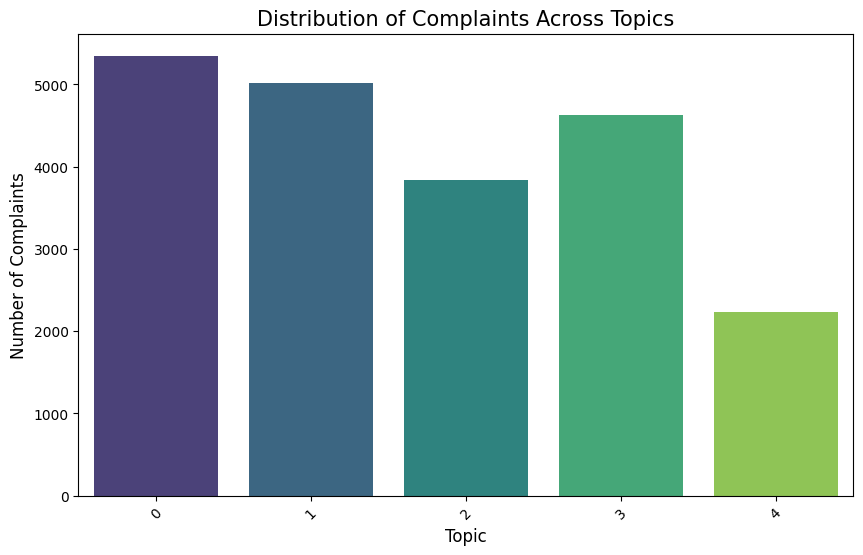

In [ ]:
# Visualizing the topic distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Topic', data=df_clean, palette='viridis')
plt.title('Distribution of Complaints Across Topics', fontsize=15)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Mapping Relevant Topic to Each Complaint**

In [ ]:
#Create the dictionary of Topic names and Topics
topic_mapping = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(topic_mapping)

In [ ]:
df_clean.head()

,complaint_text,lemmatized_complaint,complaint_POS_removed,Topic
1,good morning name xxxx xxxx appreciate could h...,good morning name xxxx xxxx appreciate could h...,morning name appreciate chase bank cardmember ...,Bank Account services
2,upgraded xxxx xxxx card told agent upgrade ann...,upgrade xxxx xxxx card tell agent upgrade anni...,card tell agent date information order upgrade...,Credit card or prepaid card
10,chase card reported however fraudulent applica...,chase card report however fraudulent applicati...,card report application submit identity consen...,Credit card or prepaid card
11,trying book xxxx xxxx ticket came across offer...,try book xxxx xxxx ticket come across offer ap...,book ticket come offer apply ticket card infor...,Credit card or prepaid card
14,grand son give check deposit chase account fun...,grand son give check deposit chase account fun...,son check deposit chase account fund chase ban...,Bank Account services


**Build the Supervised Model for making a prediction for new complaint**

In [ ]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data

training_data = df_clean[['complaint_text','Topic']]

In [ ]:
training_data.head()

,complaint_text,Topic
1,good morning name xxxx xxxx appreciate could h...,Bank Account services
2,upgraded xxxx xxxx card told agent upgrade ann...,Credit card or prepaid card
10,chase card reported however fraudulent applica...,Credit card or prepaid card
11,trying book xxxx xxxx ticket came across offer...,Credit card or prepaid card
14,grand son give check deposit chase account fun...,Bank Account services


In [ ]:
training_data['complaint_text'] = training_data['complaint_text'].str.replace('xxxx','')
training_data.head()

,complaint_text,Topic
1,good morning name appreciate could help put ...,Bank Account services
2,upgraded card told agent upgrade anniversary...,Credit card or prepaid card
10,chase card reported however fraudulent applica...,Credit card or prepaid card
11,trying book ticket came across offer applied...,Credit card or prepaid card
14,grand son give check deposit chase account fun...,Bank Account services


In [ ]:
# View value counts of the five topics
training_data['Topic'].value_counts()

,count
Topic,
Bank Account services,5351
Credit card or prepaid card,5018
Theft/Dispute Reporting,4633
Others,3835
Mortgage/Loan,2235


**Data Preprocessing**

In [ ]:
## Reverse topic names mapping for supervised learning

reverse_topic_mapping = {
    'Bank Account services' :0,
    'Credit card or prepaid card':1,
    'Others':2,
    'Theft/Dispute Reporting':3,
    'Mortgage/Loan':4
}
#Replace Topics with Topic Names
training_data['Topic'] = training_data['Topic'].map(reverse_topic_mapping)
training_data.head()

,complaint_text,Topic
1,good morning name appreciate could help put ...,0
2,upgraded card told agent upgrade anniversary...,1
10,chase card reported however fraudulent applica...,1
11,trying book ticket came across offer applied...,1
14,grand son give check deposit chase account fun...,0


In [ ]:
#Write your code to get the Vector count
count_vector=CountVectorizer()

#Write your code here to transform the word vector to tf-idf
X_train_count=count_vector.fit_transform(training_data['complaint_text'])

In [ ]:
# Saving Word Vector on disk for later usage
import pickle

pickle.dump(count_vector.vocabulary_, open("/content/drive/MyDrive/IT_Ticket/count_vector.pkl","wb"))

In [ ]:
# Transform the word vector to tf-idf
tfidf_transform= TfidfTransformer()
X_train_tfidf = tfidf_transform.fit_transform(X_train_count)

In [ ]:
# Save TF-IDF on disk for later usage
pickle.dump(tfidf_transform, open("/content/drive/MyDrive/IT_Ticket/tfidf.pkl","wb"))

In [ ]:
# Create a function to evaluate models
def model_eval(y_test, y_pred, model_name):

    # print classification report of classifier
    print(f"CLASSIFICATION REPORT for {model_name}\n")
    print(classification_report(y_test, y_pred, target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"]))

    # plot confusion matrix of the classifier
    plt.figure(figsize=(10,7))
    plt.title(f"CONFUSION MATRIX for {model_name}\n")
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, cbar=None, cmap="Greens", fmt='d', xticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"], yticklabels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting",
"Mortgage/Loan"])
    plt.show()

    return

**Model Building & Evaluation**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Use raw text for input (not TF-IDF matrix)
X = training_data['complaint_text']  # Raw text data
y = training_data['Topic']  # Labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data, and transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**Decision Tree Model**

In [ ]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the Decision Tree model on the training data
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_tfidf)

# Calculate accuracy, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTree Accuracy: {accuracy * 100:.3f}%")
recall = recall_score(y_test, y_pred, average='macro')
print(f"DecisionTree Recall: {recall * 100:.3f}%")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"DecisionTree F1: {f1 * 100:.3f}%")

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred))

DecisionTree Accuracy: 78.678%
DecisionTree Recall: 78.097%
DecisionTree F1: 78.276%
Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1630
           1       0.81      0.83      0.82      1525
           2       0.81      0.81      0.81      1109
           3       0.75      0.75      0.75      1381
           4       0.76      0.73      0.75       677

    accuracy                           0.79      6322
   macro avg       0.78      0.78      0.78      6322
weighted avg       0.79      0.79      0.79      6322



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Use raw text for input (not TF-IDF matrix)
X = training_data['complaint_text']  # Raw text data
y = training_data['Topic']  # Labels

# Step 2: Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 3: Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Step 4: Transform training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf, y_train)

# Step 6: Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test_tfidf)

# Step 7: Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {testing_accuracy * 100:.2f}%")


Testing Accuracy: 78.90%


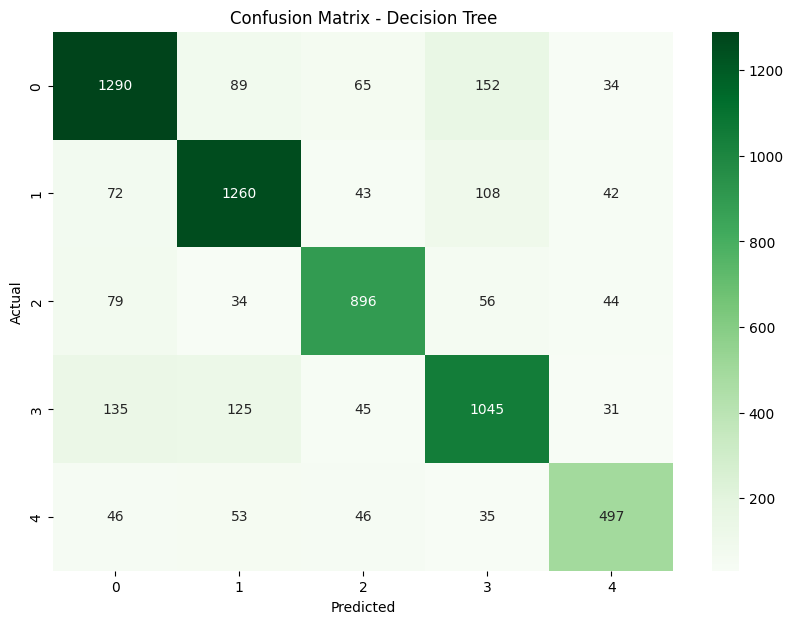

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# TensorFlow / Keras Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Scikit-learn Libraries
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from tensorflow.keras.callbacks import EarlyStopping

# Imbalanced Learning Libraries
from imblearn.over_sampling import SMOTE

# General Libraries
import numpy as np

In [ ]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Convert y_train and y_test to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

**RNN Model**

Epoch 1/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.3958 - loss: 1.4323 - val_accuracy: 0.6900 - val_loss: 0.7853
Epoch 2/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7464 - loss: 0.6849 - val_accuracy: 0.8618 - val_loss: 0.4194
Epoch 3/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9131 - loss: 0.2921 - val_accuracy: 0.8768 - val_loss: 0.4303
Epoch 4/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9467 - loss: 0.1845 - val_accuracy: 0.8874 - val_loss: 0.3535
Epoch 5/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9695 - loss: 0.1085 - val_accuracy: 0.8899 - val_loss: 0.3917
Epoch 6/10
461/461 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9794 - loss: 0.0742 - val_accuracy: 0.8749 - val_loss: 0.5162


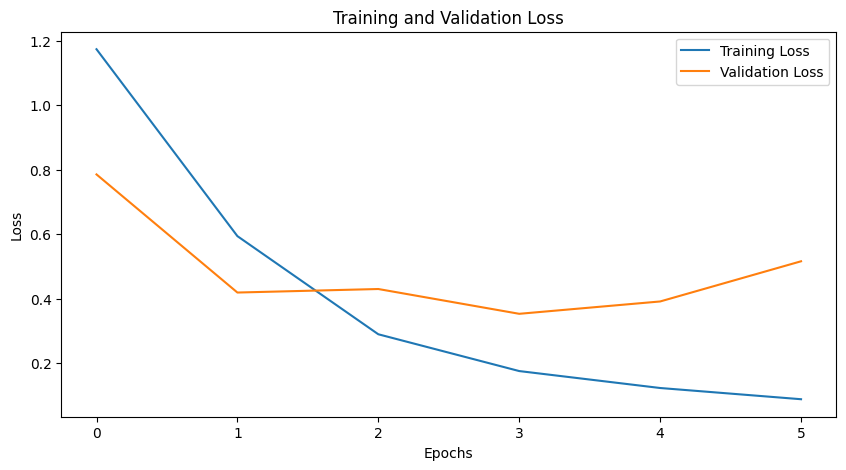

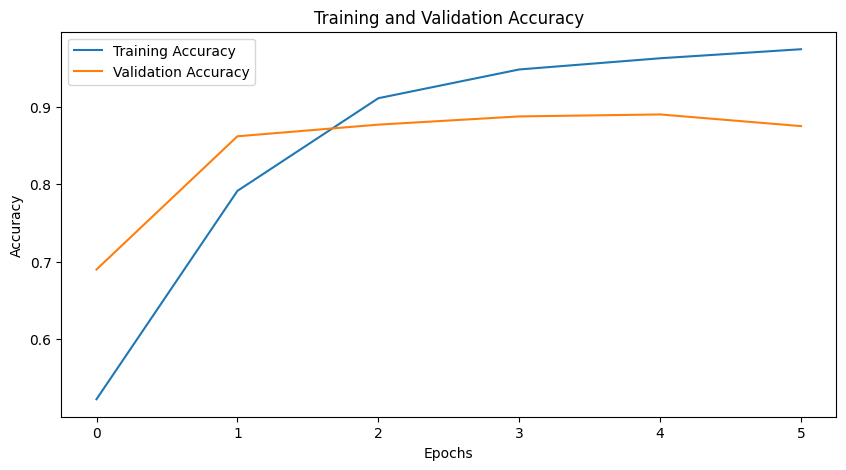

In [ ]:
# Build RNN Model
rnn_model = Sequential([
    Embedding(input_dim=20000, output_dim=256, input_length=100),
    LSTM(256, return_sequences=False),
    #Dropout(0.4),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])
rnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)



# Train RNN with Early Stopping and verbose output
history = rnn_model.fit(
    X_train_pad,
    y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test_encoded),
    class_weight=class_weights,
    callbacks=[early_stopping],
    verbose=1  # Show training progress for each epoch
)

# Plot the training and validation process
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate RNN
loss, accuracy = rnn_model.evaluate(X_test_pad, y_test_encoded)
print(f"RNN Test Accuracy: {accuracy}")

198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8840 - loss: 0.3719
RNN Test Accuracy: 0.8873774409294128


In [ ]:
# Test the trained model on test data
loss, accuracy = rnn_model.evaluate(X_test_pad, y_test_encoded, verbose=1)

# Print the results
print(f"RNN Test Loss: {loss:.4f}")
print(f"RNN Test Accuracy: {accuracy:.4f}")


198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8840 - loss: 0.3719
RNN Test Loss: 0.3535
RNN Test Accuracy: 0.8874


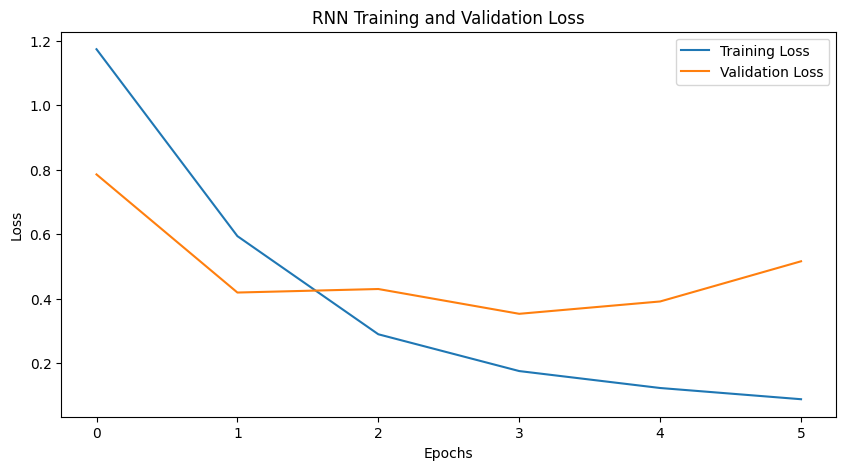

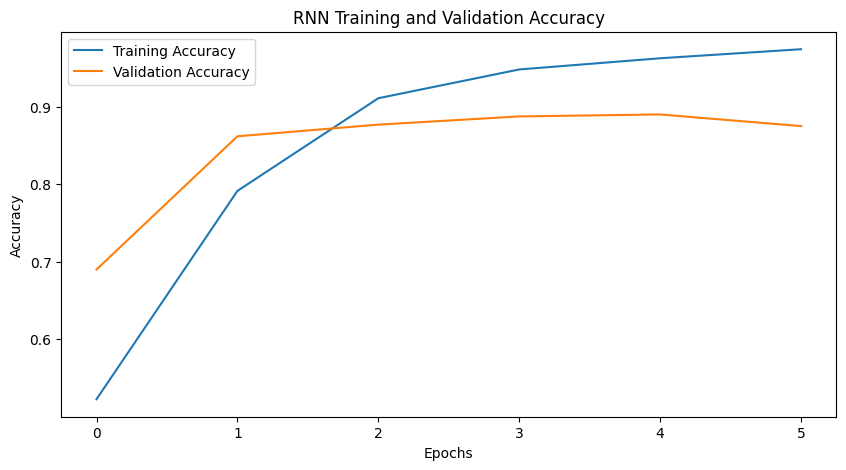

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


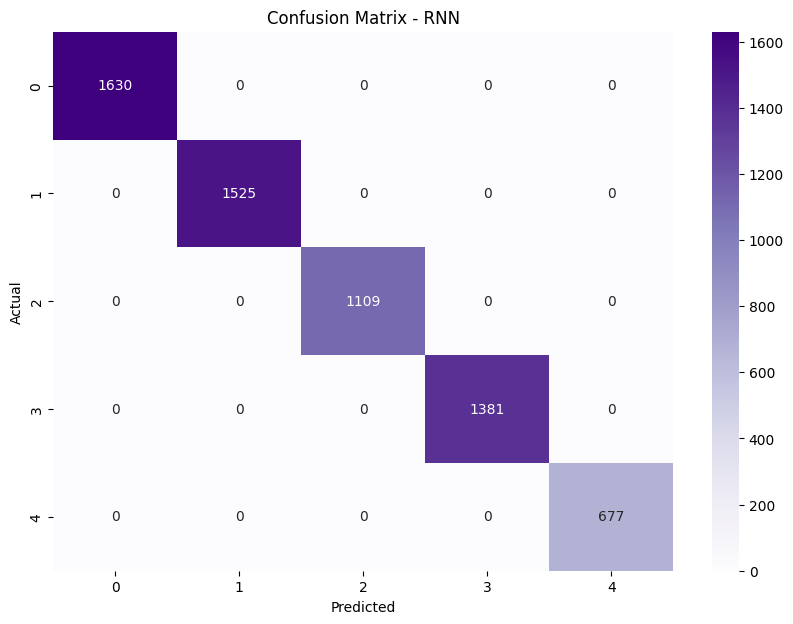

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_test_encoded), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - RNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Decision Tree with RNN Features**

461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Decision Tree with RNN Features - Best Model Evaluation
                             precision    recall  f1-score   support

      Bank Account services       0.90      0.90      0.90      1630
Credit card or prepaid card       0.91      0.89      0.90      1525
                     Others       0.91      0.89      0.90      1109
    Theft/Dispute Reporting       0.86      0.87      0.87      1381
              Mortgage/Loan       0.84      0.88      0.86       677

                   accuracy                           0.89      6322
                  macro avg       0.88      0.89      0.89      6322
               weighted avg       0.89      0.89      0.89      6322



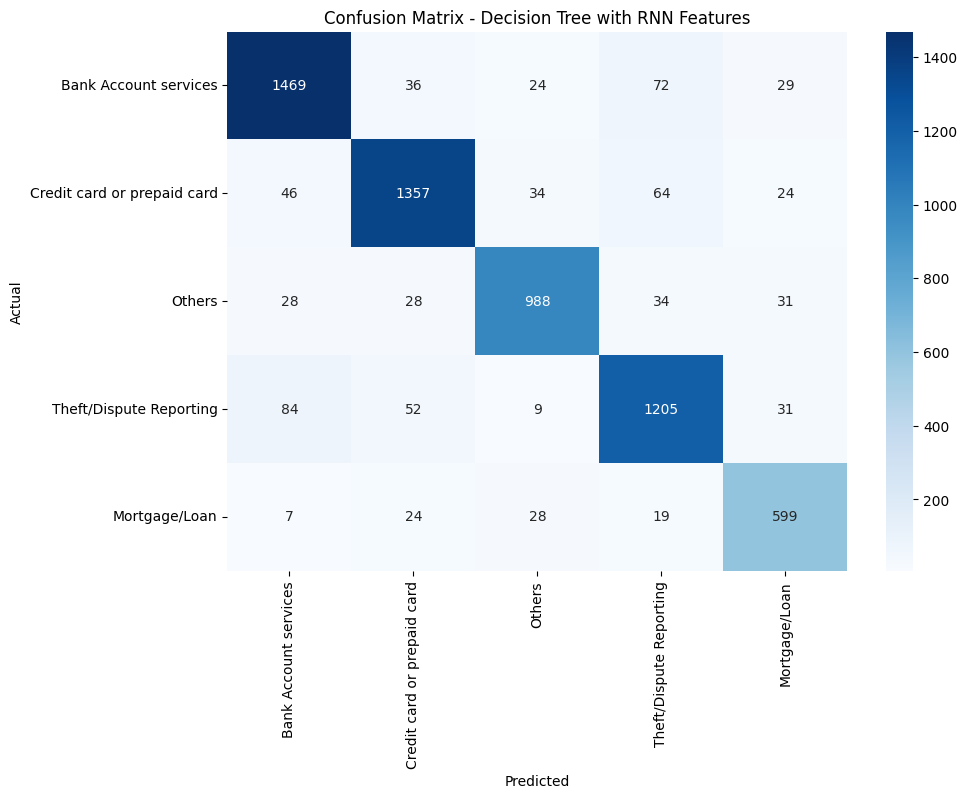

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Extract RNN Features
rnn_features_train = rnn_model.predict(X_train_pad)
rnn_features_test = rnn_model.predict(X_test_pad)

# 2. Scale the RNN Features
scaler = StandardScaler()
rnn_features_train_scaled = scaler.fit_transform(rnn_features_train)
rnn_features_test_scaled = scaler.transform(rnn_features_test)

# 3. Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30, None],        # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10],        # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']       # Criterion for splitting ('gini' or 'entropy')
}

# 4. Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# 5. Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,                 # Use 5-fold cross-validation
    scoring='accuracy',   # Scoring metric to evaluate model performance
    n_jobs=-1,            # Use all available cores for parallel processing
    verbose=1             # Output progress of GridSearch
)

# 6. Fit GridSearchCV using the scaled RNN features
grid_search.fit(rnn_features_train_scaled, y_train_encoded)

# 7. Extract the best estimator (Decision Tree with the best hyperparameters)
dt_model_rnn = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

# 8. Predict on the test set using the best model
y_pred_dt_rnn = dt_model_rnn.predict(rnn_features_test_scaled)

# Evaluate the model
print("Decision Tree with RNN Features - Best Model Evaluation")
print(classification_report(y_test_encoded, y_pred_dt_rnn, target_names=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting", "Mortgage/Loan"]))

# 9. Plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Call the confusion matrix plotting function
plot_confusion_matrix(
    y_test_encoded,
    y_pred_dt_rnn,
    labels=["Bank Account services", "Credit card or prepaid card", "Others", "Theft/Dispute Reporting", "Mortgage/Loan"],
    model_name="Decision Tree with RNN Features"
)

# Optional: Print cross-validation results
# cv_results = pd.DataFrame(grid_search.cv_results_)
# print(cv_results[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending=False))


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the trained Decision Tree model
y_pred_test = dt_model_rnn.predict(rnn_features_test_scaled)

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 88.86%


# ***Predicted on own Test Data ***

In [ ]:
# Sample customer complaints
df_custom = pd.DataFrame({'complaints': [
    "I can not get from chase who services my mortgage, who owns it and who has original loan docs",
    "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
    "I want to open a salary account at your downtown branch. Please provide me the procedure.",
    "unwanted service activated and money deducted automatically ",
    "How can I know my CIBIL score?",
    "Where are the bank branches in the city of Patna?"
]})

# Sample function for topic prediction
# Assuming topic_predictor is a model that takes in a list of complaints and returns predicted categories
def topic_predictor(complaints):
    # Example: A simple function simulating topic prediction
    # You would replace this with your trained model or pipeline
    topics = ['Mortgage', 'Billing Issue', 'Account Opening', 'Unwanted Services', 'Credit Score', 'Branch Locations']

    # Simulate a prediction (in reality, you would use a trained model to predict this)
    # For demonstration, we can map complaints to topics based on keywords
    predictions = []
    for complaint in complaints:
        if 'mortgage' in complaint.lower():
            predictions.append('Mortgage')
        elif 'bill' in complaint.lower() or 'debited' in complaint.lower():
            predictions.append('Billing Issue')
        elif 'salary account' in complaint.lower() or 'branch' in complaint.lower():
            predictions.append('Account Opening')
        elif 'unwanted' in complaint.lower() or 'money deducted' in complaint.lower():
            predictions.append('Unwanted Services')
        elif 'cibil score' in complaint.lower():
            predictions.append('Credit Score')
        elif 'branch' in complaint.lower() or 'patna' in complaint.lower():
            predictions.append('Branch Locations')
        else:
            predictions.append('General Inquiry')
    return predictions

# Apply the topic prediction model to each complaint
df_custom['Predicted Category'] = df_custom['complaints'].apply(lambda x: topic_predictor([x])[0])

# Display the dataframe with predicted categories
print(df_custom)


                                          complaints Predicted Category
0  I can not get from chase who services my mortg...           Mortgage
1  The bill amount of my credit card was debited ...      Billing Issue
2  I want to open a salary account at your downto...    Account Opening
3  unwanted service activated and money deducted ...  Unwanted Services
4                     How can I know my CIBIL score?       Credit Score
5  Where are the bank branches in the city of Patna?    Account Opening
